In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet(r"C:\Users\fatih\Downloads\Call_Report_BankData_852218.parquet", engine='fastparquet')
df.head()

,Item,IDRSSD,Value,Date,CValue,schedule,schedule.label,Label1clean,Label2clean,Label3clean,...,line2,line3,line4,line5,line6,line7,column.label,type,balance,Status
0,RCFA3792,852218.0,1.644990e+11,2014-03-31,1.644990e+11,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
1,RCFA3792,852218.0,1.683120e+11,2014-06-30,3.813000e+09,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
2,RCFA3792,852218.0,1.705590e+11,2014-09-30,2.247000e+09,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
3,RCFA3792,852218.0,1.733280e+11,2014-12-31,2.769000e+09,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
4,RCFA3792,852218.0,1.781850e+11,2015-03-31,1.781850e+11,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116740 entries, 0 to 116739
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Item              116740 non-null  object        
 1   IDRSSD            116740 non-null  float64       
 2   Value             116740 non-null  float64       
 3   Date              116740 non-null  datetime64[ns]
 4   CValue            116740 non-null  float64       
 5   schedule          116740 non-null  object        
 6   schedule.label    116740 non-null  object        
 7   Label1clean       116740 non-null  object        
 8   Label2clean       75474 non-null   object        
 9   Label3clean       27660 non-null   object        
 10  Label4clean       5131 non-null    object        
 11  Label5clean       0 non-null       float64       
 12  Label6clean       0 non-null       float64       
 13  Label7clean       0 non-null       float64       
 14  labe

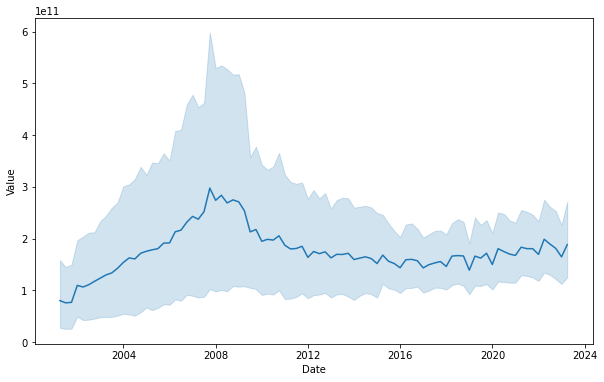

In [4]:
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Date', y='Value')
plt.show()


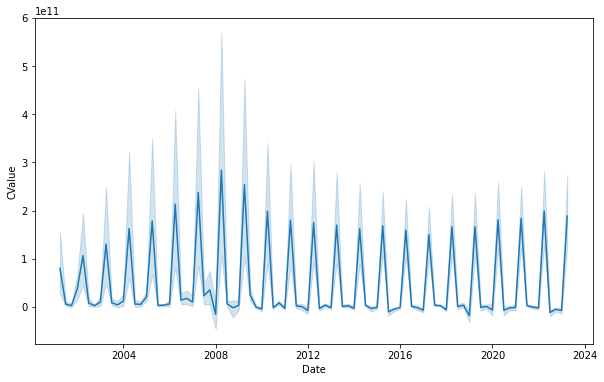

In [5]:
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Date', y='CValue')
plt.show()


In [6]:
df.isnull().sum()

Item                     0
IDRSSD                   0
Value                    0
Date                     0
CValue                   0
schedule                 0
schedule.label           0
Label1clean              0
Label2clean          41266
Label3clean          89080
Label4clean         111609
Label5clean         116740
Label6clean         116740
Label7clean         116740
labelStringclean         0
line1                    0
line2                41266
line3                89080
line4               111609
line5               116740
line6               116740
line7               116740
column.label             0
type                     0
balance               4094
Status                   0
dtype: int64

In [10]:
df.select_dtypes("number").head()

,IDRSSD,Value,CValue,Label5clean,Label6clean,Label7clean
0,852218.0,1.644990e+11,1.644990e+11,NaN,NaN,NaN
1,852218.0,1.683120e+11,3.813000e+09,NaN,NaN,NaN
2,852218.0,1.705590e+11,2.247000e+09,NaN,NaN,NaN
3,852218.0,1.733280e+11,2.769000e+09,NaN,NaN,NaN
4,852218.0,1.781850e+11,1.781850e+11,NaN,NaN,NaN


In [9]:
df.select_dtypes("object").head()

,Item,schedule,schedule.label,Label1clean,Label2clean,Label3clean,Label4clean,labelStringclean,line1,line2,line3,line4,line5,line6,line7,column.label,type,balance,Status
0,RCFA3792,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,None,Total capital,47,1,None,None,None,None,None,,monetary,credit,Main
1,RCFA3792,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,None,Total capital,47,1,None,None,None,None,None,,monetary,credit,Main
2,RCFA3792,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,None,Total capital,47,1,None,None,None,None,None,,monetary,credit,Main
3,RCFA3792,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,None,Total capital,47,1,None,None,None,None,None,,monetary,credit,Main
4,RCFA3792,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,None,Total capital,47,1,None,None,None,None,None,,monetary,credit,Main


In [11]:
df.duplicated().sum()

0

In [12]:
df[["Value", "CValue"]].corr()

,Value,CValue
Value,1.000000,0.500964
CValue,0.500964,1.000000


In [13]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [22]:
df.drop(columns= ["Item", "IDRSSD" ,"Label5clean", "Label6clean", "Label7clean", "line5", "line6", "line7"], axis=0, inplace= True)

In [23]:
df.select_dtypes("object").head()

,schedule,schedule.label,Label1clean,Label2clean,Label3clean,Label4clean,labelStringclean,line1,line2,line3,line4,column.label,type,balance,Status
0,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,None,Total capital,47,1,None,None,,monetary,credit,Main
1,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,None,Total capital,47,1,None,None,,monetary,credit,Main
2,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,None,Total capital,47,1,None,None,,monetary,credit,Main
3,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,None,Total capital,47,1,None,None,,monetary,credit,Main
4,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,None,Total capital,47,1,None,None,,monetary,credit,Main


In [25]:
for col in df.select_dtypes("object"):
  print(f"{col} has {df[col].nunique()} unique value")

schedule has 33 unique value
schedule.label has 33 unique value
Label1clean has 474 unique value
Label2clean has 462 unique value
Label3clean has 156 unique value
Label4clean has 37 unique value
labelStringclean has 759 unique value
line1 has 55 unique value
line2 has 16 unique value
line3 has 8 unique value
line4 has 6 unique value
column.label has 114 unique value
type has 5 unique value
balance has 2 unique value
Status has 2 unique value


In [35]:
df["df_IC"] = df[df["schedule.label"] == "Income Statement"][["CValue"]]
df["df_IC"]
df["df_IC"].skew()

3.1270229819908857

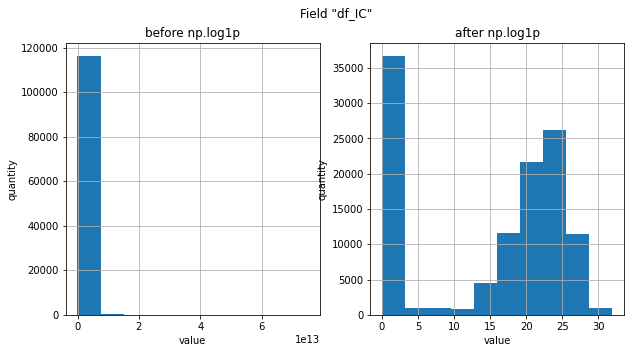

In [78]:
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
df["Value"].hist(ax=ax_before)
df["Value"].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before np.log1p', ylabel='quantity', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='quantity', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [66]:
df[field] = np.expm1(df[field])


In [73]:
df["df_IC"].skew()

-2.165296317237785

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116740 entries, 0 to 116739
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Value             116740 non-null  float64       
 1   Date              116740 non-null  datetime64[ns]
 2   CValue            91067 non-null   float64       
 3   schedule          116740 non-null  object        
 4   schedule.label    116740 non-null  object        
 5   Label1clean       116740 non-null  object        
 6   Label2clean       75474 non-null   object        
 7   Label3clean       27660 non-null   object        
 8   Label4clean       5131 non-null    object        
 9   labelStringclean  116740 non-null  object        
 10  line1             116740 non-null  object        
 11  line2             75474 non-null   object        
 12  line3             27660 non-null   object        
 13  line4             5131 non-null    object        
 14  colu

In [92]:
df[["schedule.label", "labelStringclean", "line1", "line2", "line3", "type", "df_IC"]].isnull().sum()

schedule.label           0
labelStringclean         0
line1                    0
line2                41266
line3                89080
type                     0
df_IC               110457
dtype: int64

In [105]:
df_encoding = df[["schedule.label", "labelStringclean", "line1", "line2", "line3", "type", "df_IC", "Value"]]
df_encoding
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116740 entries, 0 to 116739
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   schedule.label    116740 non-null  object 
 1   labelStringclean  116740 non-null  object 
 2   line1             116740 non-null  object 
 3   line2             75474 non-null   object 
 4   line3             27660 non-null   object 
 5   type              116740 non-null  object 
 6   df_IC             6283 non-null    float64
 7   Value             116740 non-null  float64
dtypes: float64(2), object(6)
memory usage: 7.1+ MB


In [106]:
df_encoding.dropna(inplace=True)

C:\Users\fatih\AppData\Local\Temp\ipykernel_56664\2763050817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoding.dropna(inplace=True)


In [107]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 98135 to 116739
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   schedule.label    2085 non-null   object 
 1   labelStringclean  2085 non-null   object 
 2   line1             2085 non-null   object 
 3   line2             2085 non-null   object 
 4   line3             2085 non-null   object 
 5   type              2085 non-null   object 
 6   df_IC             2085 non-null   float64
 7   Value             2085 non-null   float64
dtypes: float64(2), object(6)
memory usage: 146.6+ KB


In [108]:
for col in df_encoding.select_dtypes("object"):
  print(f"{col} has {df_encoding[col].nunique()} unique value")

schedule.label has 1 unique value
labelStringclean has 31 unique value
line1 has 6 unique value
line2 has 6 unique value
line3 has 5 unique value
type has 1 unique value


In [114]:
df_encod_new = df_encoding[["labelStringclean", "line1", "line2", "line3"]]
df_encod_new
df_encod_new.head()

,labelStringclean,line1,line2,line3
98135,Total interest and fee income on loans,1,1,3
98136,Total interest and fee income on loans,1,1,3
98137,Total interest and fee income on loans,1,1,3
98138,Total interest and fee income on loans,1,1,3
98139,Total interest and fee income on loans,1,1,3


In [115]:
df_encod_new_num = df_encoding[["df_IC", "Value"]]
df_encod_new_num
df_encod_new_num.head()

,df_IC,Value
98135,1.329658,3.041000e+09
98136,1.329656,5.749000e+09
98137,1.329655,8.178000e+09
98138,1.329659,1.153900e+10
98139,1.329655,2.295000e+09


In [109]:
for col in df_encoding.select_dtypes("number"):
  print(f"{col} has {df_encoding[col].nunique()} unique value")

df_IC has 974 unique value
Value has 1217 unique value


In [116]:
df_encoding.shape

(2085, 8)

In [118]:
df_encod_new_encoded = pd.get_dummies(df_encod_new)
df_encod_new_encoded
df_encod_new_encoded.shape

(2085, 48)

In [120]:
df_final = pd.concat([df_encod_new_num, df_encod_new_encoded], axis=1)
df_final.shape


(2085, 50)

In [123]:
from sklearn.model_selection import train_test_split

X = df_final.drop('df_IC', axis=1)
y = df_final['df_IC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

train_preds = model.predict(X_train)
print("Eğitim seti performansı:")
print(f"Eğitim seti hata oranı: {mean_squared_error(y_train, train_preds, squared=False)}")

test_preds = model.predict(X_test)
print("Test seti performansı:")
print(f"Test seti hata oranı: {mean_squared_error(y_test, test_preds, squared=False)}")


Eğitim seti performansı:
Eğitim seti hata oranı: 0.0012422964190833624
Test seti performansı:
Test seti hata oranı: 0.001549155614756942


In [125]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

cv_scores = np.sqrt(-cv_scores)

print('Çapraz Doğrulama skorları: ', cv_scores)
print('Ortalama Çapraz Doğrulama skoru: ', cv_scores.mean())

Çapraz Doğrulama skorları:  [2.18270948e-03 1.26199176e-03 3.96880574e-03 1.26198918e-03
 4.07769113e-03 1.43012105e-03 1.26200039e-03 1.98221486e-03
 7.80524441e-06 9.04305669e-04]
Ortalama Çapraz Doğrulama skoru:  0.0018339634497036993


In [139]:
importance = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
print(importance.sort_values('importance', ascending=False))


                                              feature    importance
0                                               Value  9.945370e-01
38                                            line2_1  1.405360e-03
5                          labelStringclean_CVA hedge  1.403676e-03
48                                            line3_5  1.254783e-03
15  labelStringclean_Gross debit valuation adjustm...  7.086660e-04
31  labelStringclean_Underwriting income from insu...  6.902620e-04
36                                            line1_5  3.458636e-08
46                                            line3_3  2.231694e-08
21  labelStringclean_Loans to finance agricultural...  1.674162e-08
32                                            line1_1  1.619516e-08
19  labelStringclean_Investment banking, advisory,...  1.099984e-08
20  labelStringclean_Loans secured by 1-4 family r...  9.907264e-09
12  labelStringclean_Fees and commissions from sec...  7.627986e-09
1   labelStringclean_All other loans in domestic

In [142]:
importance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature     49 non-null     object 
 1   importance  49 non-null     float64
dtypes: float64(1), object(1)
memory usage: 912.0+ bytes


In [149]:
importance.head()

,feature,importance
0,Value,9.945370e-01
1,labelStringclean_All other loans in domestic o...,7.422634e-09
2,labelStringclean_All other loans secured by re...,1.845917e-09
3,labelStringclean_All other securities (include...,4.681685e-09
4,labelStringclean_Amortization expense and impa...,4.221130e-09


In [150]:
importance.sort_values(ascending= False, by= "importance")

,feature,importance
0,Value,9.945370e-01
38,line2_1,1.405360e-03
5,labelStringclean_CVA hedge,1.403676e-03
48,line3_5,1.254783e-03
15,labelStringclean_Gross debit valuation adjustm...,7.086660e-04
31,labelStringclean_Underwriting income from insu...,6.902620e-04
36,line1_5,3.458636e-08
46,line3_3,2.231694e-08
21,labelStringclean_Loans to finance agricultural...,1.674162e-08
32,line1_1,1.619516e-08
